#Imports

In [ ]:
import numpy as np
import tensorflow as tf
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
tfk = tf.keras
tfkl = tfk.layers
import gc
import cv2
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from functools import partial
from itertools import product

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


## Setting a seed on all frameworks for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 1234

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

#Load Dataset

In [ ]:
datasetPath = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset"

In [ ]:
%cd drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


In [ ]:
errors = pd.read_csv("errors.csv")

In [ ]:
%ls

 DATASET_CLASSIFICATORESMALL/      preprocessed_dataset.npz   strange_images/
 DATASET_CLASSIFICATORESMALL.zip   preprocessed_dataset.zip   strange_images_classes.csv
 errors.csv                        README.gdoc               'zip&download.ipynb'


In [ ]:
X_train = []
Y_train = []
X_val = []
Y_val = []
X_test = []
Y_test = []

dir = "DATASET_CLASSIFICATORESMALL"
images = os.listdir(dir)
images.sort()
if ".DS_Store" in images:
    print("Rimosso .DS_Store")
    images.remove(".DS_Store")

In [ ]:
len(images)

8814

In [ ]:
len(errors)

16665

In [ ]:
np.random.seed(42)
print(gc.collect())

angle = -8
step = 0.1
old_distance = np.inf

i = -1
for image in tqdm(images):
  i += 1

  for j,elem in enumerate(image):
      if elem == '_':
          start = j

  distance = int(image[start+1:-4])
  if distance > old_distance:
     angle += step

  old_distance = distance

  train_val_test = np.random.randint(0,20) #random value to decide if set of images will be assigned to training, validation or test set (70%,10%,20%)

  if train_val_test < 7:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_train.append(image.astype('float16')/255)
    Y_train.append([errors[i:i+1]['STD'][i],distance, angle])
  elif train_val_test < 8:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_val.append(image.astype('float16')/255)
    Y_val.append([errors[i:i+1]['STD'][i],distance, angle])
  elif train_val_test < 10:
    image = cv2.imread("DATASET_CLASSIFICATORESMALL/" + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.resize(image, (446,446))
    #image = cv2.GaussianBlur(image, (7,7), 0)
    #image[image>81] = 255
    #image[(image<=81) & (image > 61)] = 175
    #image[(image<=61) & (image > 41)] = 105
    #image[(image<=41) & (image > 21)] = 55
    #image[image<21] = 0
    #image = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
    X_test.append(image.astype('float16')/255)
    Y_test.append([errors[i:i+1]['STD'][i],distance, angle])

0


  0%|          | 0/8814 [00:00<?, ?it/s]

#Apply Augmentation

In [ ]:
%ls

 DATASET_CLASSIFICATORESMALL/      preprocessed_dataset.npz   strange_images/
 DATASET_CLASSIFICATORESMALL.zip   preprocessed_dataset.zip   strange_images_classes.csv
 errors.csv                        README.gdoc               'zip&download.ipynb'


In [ ]:
%cd strange_images

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset/strange_images


In [ ]:
X_strange = []

dir = "Immagini/"
images = os.listdir(dir)
images.sort()
if ".DS_Store" in images:
    images.remove(".DS_Store")
np.random.seed(42)
print(gc.collect())

for image in tqdm(images):
    image = cv2.imread(dir + image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (560,560))
    X_strange.append(image)#.astype('float16')/255)

X_strange = np.array(X_strange)
X_strange = np.expand_dims(X_strange,axis=-1)
X_strange.shape

17


  0%|          | 0/41 [00:00<?, ?it/s]

(41, 560, 560, 1)

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_uEu56UfwrBHAm5_JXL_gNVyl5kFHtG5/HPPS/Project/ModelClassification/Dataset


In [ ]:
classes = pd.read_csv("strange_images_classes.csv")

In [ ]:
gen = ImageDataGenerator(rotation_range=60,
                         height_shift_range=25,
                         width_shift_range=25,
                         zoom_range=[1,1.5],
                         #brightness_range = [0.9,1.0],
                         horizontal_flip=False,
                         vertical_flip=False,
                         fill_mode='nearest')

In [ ]:
for j in tqdm(range(70)):
  for i in range(X_strange.shape[0]):

    train_val_test = np.random.randint(0,10) #random value to decide if set of images will be assigned to training, validation or test set (70%,10%,20%)
    if train_val_test < 7:
      t1 = gen.get_random_transform(img_shape=(560, 560), seed=seed+i+8*j)
      augmented1 = gen.apply_transform(X_strange[i], t1)
      augmented1 = augmented1.astype('float16')/255
      X_train.append(augmented1[:,:,0])
      Y_train.append((classes['Classe'][i],0,0))

    else:
      t1 = gen.get_random_transform(img_shape=(560, 560), seed=seed+i+123+67*j)
      augmented1 = gen.apply_transform(X_strange[i], t1)
      augmented1 = augmented1.astype('float16')/255
      X_val.append(augmented1[:,:,0])
      Y_val.append((classes['Classe'][i],0,0))

  0%|          | 0/70 [00:00<?, ?it/s]

#Visualisation

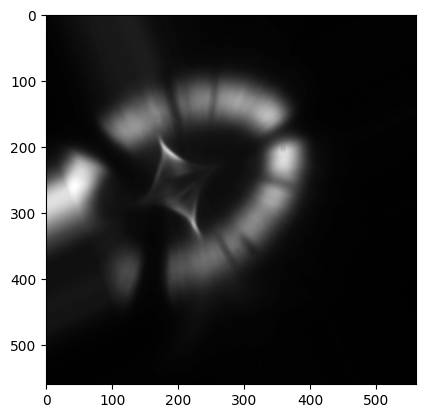

In [ ]:
plt.imshow(X_train[-1],cmap='gray')

#Create Cathegory

In [ ]:
#gc.collect()

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype="float32")
print("Shape of Train set's images: " + str(X_train.shape))
print("Shape of Train set's labels: " + str(Y_train.shape))

X_val = np.array(X_val)
Y_val = np.array(Y_val, dtype="float32")
print("Shape of Val set's images: " + str(X_val.shape))
print("Shape of Val set's labels: " + str(Y_val.shape))

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype="float32")
print("Shape of Test set's images: " + str(X_test.shape))
print("Shape of Test set's labels: " + str(Y_test.shape))

Shape of Train set's images: (5029, 560, 560)
Shape of Train set's labels: (5029, 3)
Shape of Val set's images: (1341, 560, 560)
Shape of Val set's labels: (1341, 3)
Shape of Test set's images: (862, 560, 560)
Shape of Test set's labels: (862, 3)


In [ ]:
#Y_train = Y_train[:,:3]
#Y_val = Y_val[:,:3]
#Y_test = Y_test[:,:3]

In [ ]:
binary = False #ERASE COMMENTS TO MAKE IT NOT BINARY
threshold1 = 30
threshold2 = 30
train_categories = []
val_categories = []
test_categories = []

if not binary:
  #1 in position 0 means good prediction, 1 in position 1 means bad prediction, 1 in position 2 means unavailable prediction
  for row in Y_train:
      if row[0] > threshold2:
          train_categories.append([0,0,1])
      #elif row[0] > threshold1:
          #train_categories.append([0,1,0])
      else:
          train_categories.append([1,0,0])

  train_categories = np.array(train_categories)

  for row in Y_val:
      if row[0] > threshold2:
          val_categories.append([0,0,1])
      #elif row[0] > threshold1:
          #val_categories.append([0,1,0])
      else:
          val_categories.append([1,0,0])

  val_categories = np.array(val_categories)

  for row in Y_test:
      if row[0] > threshold2:
          test_categories.append([0,0,1])
      #elif row[0] > threshold1:
          #test_categories.append([0,1,0])
      else:
          test_categories.append([1,0,0])

  test_categories = np.array(test_categories)
else:
  #0 means good prediction, 1 means unavailable prediction
  for row in Y_train:
      if row[0] > threshold1:
          train_categories.append([1])
      else:
          train_categories.append([0])

  train_categories = np.array(train_categories)

  for row in Y_val:
      if row[0] > threshold1:
          val_categories.append([1])
      else:
          val_categories.append([0])

  val_categories = np.array(val_categories)

  for row in Y_test:
      if row[0] > threshold1:
          test_categories.append([1])
      else:
          test_categories.append([0])

  test_categories = np.array(test_categories)

Y_train = np.hstack([Y_train, train_categories])
Y_val = np.hstack([Y_val, val_categories])
Y_test = np.hstack([Y_test, test_categories])


In [ ]:
Y_train.shape, Y_val.shape, Y_test.shape

((5029, 6), (1341, 6), (862, 6))

In [ ]:
np.mean(Y_train[:,3]), np.mean(Y_train[:,4]), np.mean(Y_train[:,5]) #labels distribution

(np.float64(0.8456949691787632),
 np.float64(0.0),
 np.float64(0.15430503082123684))

In [ ]:
X_train = np.expand_dims(X_train,3)
X_val = np.expand_dims(X_val,3)
X_test = np.expand_dims(X_test,3)

#Save Dataset

In [ ]:
import numpy as np

# Define the path to save the data
file_path = "preprocessed_binary_dataset.npz"

# Save all datasets
np.savez_compressed(file_path,
                    X_train=X_train, Y_train=Y_train,
                    X_val=X_val, Y_val=Y_val,
                    X_test=X_test, Y_test=Y_test)

print(f"Dataset saved to {file_path}")


Dataset saved to preprocessed_binary_dataset.npz


#Transform for Board

##Single image

In [ ]:
import numpy as np
import cv2

dataset_path = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset/preprocessed_binary_dataset.npz"
destination_path = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset/test_input.npy"

# Carica il dataset
data = np.load(dataset_path)
X_test = data["X_test"]
print("Original X_test shape:", X_test.shape)
print("Original dtype:", X_test.dtype)
print("Min/Max:", X_test.min(), X_test.max())

# Prendi una singola immagine e converti a float32
img = X_test[0].astype(np.float32)  # shape: (560, 560, 1)
img_resized = cv2.resize(img.squeeze(), (300, 300), interpolation=cv2.INTER_AREA)
img_resized = np.expand_dims(img_resized, axis=-1)  # shape: (300, 300, 1)

# Converti a uint8
img_uint8 = (img_resized * 255).astype(np.uint8)
img_uint8 = np.expand_dims(img_uint8, axis=0)  # shape: (1, 300, 300, 1)

print("Final shape (ready for FINN):", img_uint8.shape)
print("Final dtype:", img_uint8.dtype)

# Salva
np.save(destination_path, img_uint8)


Original X_test shape: (862, 560, 560, 1)
Original dtype: float16
Min/Max: 0.0353 1.0
Final shape (ready for FINN): (1, 300, 300, 1)
Final dtype: uint8


##Multiple Images

In [ ]:
import numpy as np
import cv2

n_images = 400
size=128
dataset_path = "drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset/preprocessed_binary_dataset.npz"
destination_path = f"drive/MyDrive/HPPS_Nico/HPPS/Project/ModelClassification/Dataset/BoardInput/test_input_{n_images}_reverse_01.npy"

# Load the dataset
data = np.load(dataset_path)
X_test = data["X_test"]
print("Original X_test shape:", X_test.shape)

# List to store images with shape (1, 300, 300, 1)
processed_imgs = []

for i in range(862-n_images, 862):
    img = X_test[i].astype(np.float32)
    img_resized = cv2.resize(img.squeeze(), (size, size), interpolation=cv2.INTER_AREA)  # (size, size)
    img_resized = np.expand_dims(img_resized, axis=-1)  # (300, 300, 1)
    img_resized = np.expand_dims(img_resized, axis=0)   # (1, 300, 300, 1)
    img_uint8 = (img_resized * 255).astype(np.uint8)    # scale to [0, 255]
    #img_uint8 = img_resized  # Already in float32 and in [0, 1]
    processed_imgs.append(img_uint8)

# Stack into a single array of shape (n_images, 300, 300, 1)
processed_array = np.concatenate(processed_imgs, axis=0)
print("Final shape:", processed_array.shape)

# Save the result as a standard .npy array (no pickle needed)
np.save(destination_path, processed_array)


Original X_test shape: (862, 560, 560, 1)
Final shape: (400, 128, 128, 1)


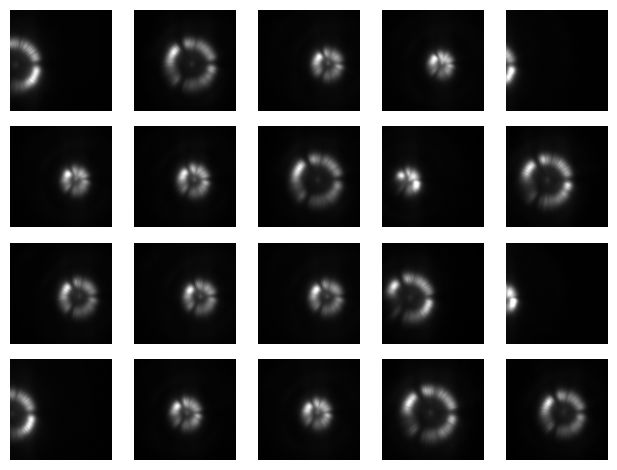

In [ ]:
import random

# Seleziona 20 indici casuali
random_indices = random.sample(range(processed_array.shape[0]), 20)

# Mostra le immagini selezionate
for idx, i in enumerate(random_indices):
    plt.subplot(4, 5, idx + 1)
    plt.imshow(processed_array[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()
